# Data Analysis and Evaluation:
*Clearly detail your methods used in each part. Qualitative claims made in the exposition should have numerical backing here (instead of “X is larger than Y” write “X is 3.65 times larger than Y”). This should read like a scientific paper, but does not need to be "stuffy" or overly indirect. A reader should be able to replicate your experiments and findings via their own code after reading this.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [44]:
data = pd.read_csv("data.csv", index_col=0)
data.head()

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_inlinks,outlinks,unique_outlinks,external_outlinks,unique_external_outlinks,total_links,page_auth,linking_domains_to_page,outbound_domains_from_page,outbound_links_from_page,pub_date
0,https://www.mayoclinic.org/diseases-conditions...,atrial fibrillation,19,"Find out about atrial fibrillation, a heart co...",152,68770,2732,31,19,100,71,75,52,5801,62,882,10,34,2019-06-20
1,https://www.mayoclinic.org/diseases-conditions...,achilles tendinitis,19,Achilles tendinitis — Comprehensive overview c...,103,45417,1438,9,4,70,43,69,46,1242,60,397,10,32,2019-09-17
2,https://www.mayoclinic.org/diseases-conditions...,gastroesophageal reflux disease (gerd),38,"GERD, in which stomach acid moves into the eso...",140,52830,1555,16,8,85,52,71,47,6148,62,1091,10,35,2020-04-03
3,https://www.mayoclinic.org/diseases-conditions...,acne,4,"Learn more about this common skin condition, i...",144,59112,2067,11,6,85,57,71,48,4497,63,1290,10,34,2020-02-18
4,https://www.mayoclinic.org/diseases-conditions...,hiv/aids,8,Learn more about this potentially life-threate...,142,61851,2856,14,5,76,47,68,46,2793,60,575,10,33,2020-02-13


In [45]:
data.shape

(216, 19)

In [46]:
print("Means:")
print(data.mean())
print()
print("Standard Deviations:")
print(data.std())

Means:
header_len                       16.620370
meta_len                        132.916667
bytes                         55134.175926
word_count                     2050.333333
inlinks                          12.995370
unique_inlinks                    6.125000
outlinks                         79.574074
unique_outlinks                  50.967593
external_outlinks                71.662037
unique_external_outlinks         48.976852
total_links                    4146.416667
page_auth                        61.495370
linking_domains_to_page         861.532407
outbound_domains_from_page        9.597222
outbound_links_from_page         30.712963
dtype: float64

Standard Deviations:
header_len                        8.486616
meta_len                         20.897813
bytes                         11749.217542
word_count                      589.314833
inlinks                           8.291491
unique_inlinks                    5.437863
outlinks                         12.738664
unique_out

In [4]:
data.columns

Index(['url', 'header', 'header_len', 'meta', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_inlinks', '%unique_in', 'outlinks',
       'unique_outlinks', 'external_outlinks', 'unique_external_outlinks',
       'total_links', 'page_auth', 'linking_domains_to_page',
       'outbound_domains_from_page', 'outbound_links_from_page', 'pub_date'],
      dtype='object')

Now that I have the dataset I'll be working with, I examine all of the columns to determine useful ways I could analyze the data.

'Url','header', 'meta’, and 'pub_date' aren't quantitative; url and header are indicative of the page and its content, and meta is the description provided by the page for search engines to display in search (though sometimes search engines choose different text from the page). It is an important SEO tactic to include the meta description so that the search engine has an easier time analyzing the quality of the page. It would be interesting to see if the length of the meta description has any influence on page authority. I also want to look at which pages have the header included in the meta description. As for the publication dates, I will convert those to a new format so that I can compare them more easily.

The other data I have to look through is word count, page size in bytes, page authority, and link data (for which I have many columns).

**Notes from Moz on how they calculate page authority:**

*Page Authority is based on data from our web index and takes into account dozens of factors. ... uses a machine learning model to identify the algorithm that best correlates with rankings across the thousands of SERPs that we predict against, then produces Page Authority scores using that specific calculation. ... We score Page Authority on a 100-point logarithmic scale. Thus, it's significantly easier to grow your score from 20 to 30 than it is to grow from 70 to 80. ... Page Authority is based off data from the Mozscape web index and includes link counts and dozens of other factors (more than 40 in total). Importantly, it does not take into consideration specific on-page elements like keyword use or content optimization.*

I'll start by reformatting columns that still need it. Then, I'll tackle the data analysis group by group, organizing in **"bites-at-the-apple"** format: looking for trends or relationships between meta description, word count, page size, page authority, quantity of different kinds of links, and publication date.

### meta description

In [5]:
data["meta_len"].min()

70

In [6]:
data["meta_len"].max()

161

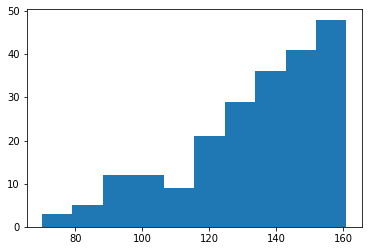

In [7]:
plt.hist(data["meta_len"])
plt.show()

### word count

In [8]:
# examine range of word count
data["word_count"].min()

1055

In [9]:
data["word_count"].max()

5194

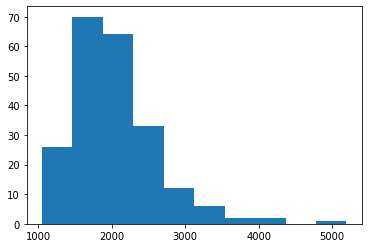

In [10]:
plt.hist(data.word_count)
plt.show()

In [11]:
data["word_count"].mean().round(0)

2050.0

In [12]:
data.word_count.std()

589.314832744793

### page size

In [13]:
#range of page size
data["bytes"].min()

41133

In [14]:
data["bytes"].max()

164386

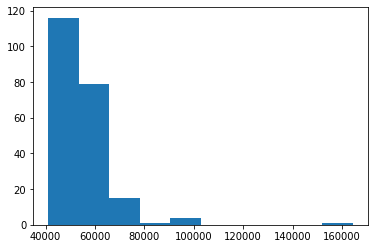

In [15]:
plt.hist(data.bytes)
plt.show()

In [16]:
# outlier max value
data.loc[data["bytes"]==164386]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_inlinks,%unique_in,outlinks,unique_outlinks,external_outlinks,unique_external_outlinks,total_links,page_auth,linking_domains_to_page,outbound_domains_from_page,outbound_links_from_page,pub_date
85,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,0.31,97,62,263,240,14924,62,554,0,0,"May 12, 2020"


In [17]:
# this makes sense–they made a big page about coronavirus!
data[data.bytes>120000]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_inlinks,%unique_in,outlinks,unique_outlinks,external_outlinks,unique_external_outlinks,total_links,page_auth,linking_domains_to_page,outbound_domains_from_page,outbound_links_from_page,pub_date
85,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,0.31,97,62,263,240,14924,62,554,0,0,"May 12, 2020"


In [18]:
# look at the data without the outlier
mod = data.loc[data["header"]!="coronavirus disease 2019 (covid-19)"]
mod.shape

(215, 20)

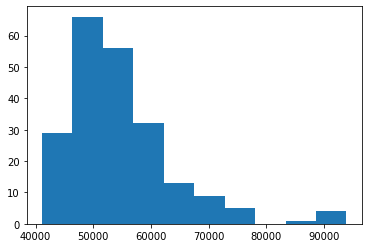

In [19]:
plt.hist(mod.bytes)
plt.show()

In [20]:
round(data.bytes.mean(), 3)

55134.176

In [21]:
round(data.bytes.std(),3)

11749.218

### page authority

In [22]:
data.page_auth.min()

60

In [23]:
data.page_auth.max()

67

### links

In [24]:
#'inlinks', 'unique_inlinks', '%unique_in'

data['%unique_in'].mean()

0.26999999999999996

In [25]:
inl = data["inlinks"].mean()
uni = data['unique_inlinks'].mean()

uni/inl

0.4713216957605985

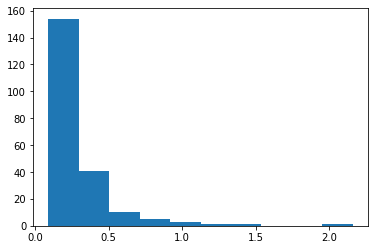

In [26]:
plt.hist(data['%unique_in'])
plt.show()

In [27]:
data["inlinks"][0]

31

In [28]:
data["unique_inlinks"][0]

19

In [29]:
data['%unique_in'][0]

0.84

In [30]:
19/31

0.6129032258064516

In [31]:
#'outlinks', 'unique_outlinks'



In [32]:
#'external_outlinks', 'unique_external_outlinks'



In [33]:
#'total_links'



In [34]:
#'linking_domains_to_page'



In [35]:
#'outbound_domains_from_page', 'outbound_links_from_page'


### publication date

### correlation: page authority and linking domains to page

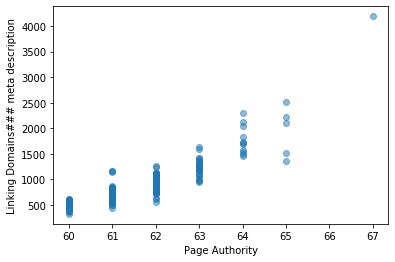

In [36]:
plt.scatter(data['page_auth'], data['linking_domains_to_page'], alpha=0.5)
#plt.axis([0, 70, 0, 6000])
plt.xlabel("Page Authority")
plt.ylabel("Linking Domains### meta description")
plt.show()

In [37]:
np.corrcoef(data['page_auth'], data['linking_domains_to_page'])

array([[1.        , 0.88650589],
       [0.88650589, 1.        ]])

### correlation: page authority and total links

In [38]:
np.corrcoef(data['page_auth'], data['total_links'])

array([[1.        , 0.51072614],
       [0.51072614, 1.        ]])

## Evaluation of significance.
*Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness.*

*Advanced analyses will be clear, logical, and methodical. Mathematical modeling will have clear purpose that answers relevant questions and contributes to an overall perspective. Results will be contextualized with significance tests or comparisons to alternative simpler explanations. Reasonable "next questions" should be followed or acknowledged, though you don't have to follow every lead.*

*Advanced code will be succinct and well-organized, with comments that indicate expected uses and assumptions for inputs and outputs. Repeated tasks will be broken into functions. Variable names will be informative. Points of failure are anticipated and checked for.*

## acknowledgements

https://moz.com/learn/seo/page-authority

Matplotlib documentation

seo spider user guide https://www.screamingfrog.co.uk/seo-spider/user-guide/tabs/

stack overflow

https://regex101.com/

https://stackoverflow.com/questions/1687620/regex-match-everything-but-specific-pattern